In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Importing data files

merged_data_df = pd.read_csv("Resources/merged_output.csv")
merged_data_df.head()

C:\Users\Uzma\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10,13,14,15,16,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
0,0,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3516.0,2006.0
1,1,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3517.0,2006.0
2,2,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3518.0,2006.0
3,3,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3519.0,2006.0
4,4,2956-A TREAT BOULEVARD,21.0,1.1,0.0,0.578261,Parts per million,Concord,Alameda,6001.0,...,5.0,2.0,3.0,1.000000,Parts per billion,2.0,California,6.0,3520.0,2006.0


In [4]:
# Removing decimal and zero from 'Year' column
merged_data_df['Year'] = merged_data_df['Year'].astype(str).replace('\.0', '', regex=True)
merged_data_df.head()

,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
0,0,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3516.0,2006
1,1,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3517.0,2006
2,2,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3518.0,2006
3,3,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3519.0,2006
4,4,2956-A TREAT BOULEVARD,21.0,1.1,0.0,0.578261,Parts per million,Concord,Alameda,6001.0,...,5.0,2.0,3.0,1.000000,Parts per billion,2.0,California,6.0,3520.0,2006


#### Generate a summary statistics table of mean, median, variance, 
#### standard deviation, and SEM for each pollutants verses county

#### Calculations for O3 AQI:

In [5]:
# Group by County and aggregate mean, median, variance, standard deviation, and SEM of the O3 AQI (Ozone Air Quality Index) for each County.
stat_O3_df = merged_data_df.groupby(['County']).agg({'O3 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std, st.sem]})
stat_O3_df.head()

O3 AQI                                                         
            amax  amin       mean median         var        std       sem
County                                                                   
Alameda     74.0   0.0  22.707196   23.0   76.225202   8.730705  0.105481
Amador      50.0  10.0  29.121951   28.0   93.159756   9.651930  1.507378
Butte      116.0   6.0  30.250000   27.0  232.075203  15.234015  1.368055
Calaveras  116.0  11.0  37.000000   31.0  600.097561  24.496889  3.779952
Colusa      36.0  29.0  32.500000   32.5   24.500000   4.949747  3.500000

In [6]:
# Rename columns for mean, median, variance, standard deviation, and SEM of the O3 AQI (Ozone Air Quality Index) for each County.

stat_O3_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation', 'Std_Error_of_Mean']
stat_O3_df.head()

,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation,Std_Error_of_Mean
County,,,,,,,
Alameda,74.0,0.0,22.707196,23.0,76.225202,8.730705,0.105481
Amador,50.0,10.0,29.121951,28.0,93.159756,9.651930,1.507378
Butte,116.0,6.0,30.250000,27.0,232.075203,15.234015,1.368055
Calaveras,116.0,11.0,37.000000,31.0,600.097561,24.496889,3.779952
Colusa,36.0,29.0,32.500000,32.5,24.500000,4.949747,3.500000


In [7]:
# Extracting County with the max value of O3 (Ozone AQI) summary statistics.
o3_df = stat_O3_df.loc[stat_O3_df['Max_Value'].idxmax()]
o3_df

Max_Value              210.000000
Min_Value                2.000000
Mean                    54.623911
Median                  41.000000
Variance              1570.055748
Standard_Deviation      39.623929
Std_Error_of_Mean        0.321944
Name: Riverside, dtype: float64

#### Visual Representation of Statistical Summary for 'Riverside' County

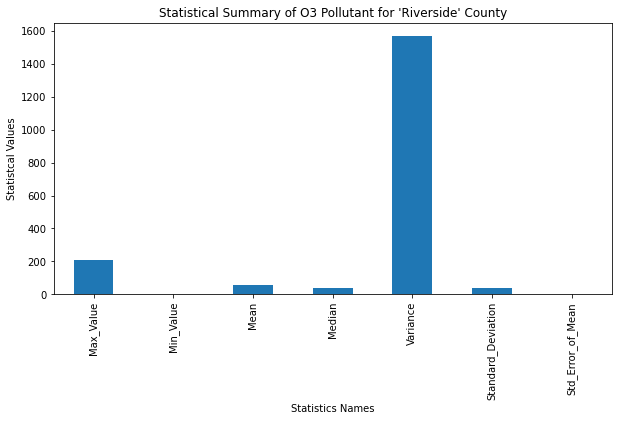

<Figure size 432x288 with 0 Axes>

In [8]:
# Use DataFrame.plot() in order to create a bar chart of the data
o3_df.plot(kind="bar", figsize=(10,5))

# Give our chart some labels and a tile
plt.title("Statistical Summary of O3 Pollutant for 'Riverside' County")
plt.xlabel("Statistics Names")
plt.ylabel("Statistcal Values")
plt.show()
plt.tight_layout()